In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the DataSet 

In [2]:
df=pd.read_excel("RawData.xlsx")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name.5,Unit Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,NaN,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,NaN,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,NaN,128,4,0.0,8.17,High,512,452.5479,520.17,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,NaN,177,3,0.5,4.82,High,531,235.1784,270.32,2011
4,CA-2011-1510,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,NaN,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088


In [3]:
df.shape

(51318, 28)

### Data cleaning

In [4]:
dfc=df.copy()
dfc.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'product_name.1',
       'product_name.2', 'product_name.3', 'product_name.4', 'product_name.5',
       'Unit Price', 'quantity', 'discount', 'shipping_cost', 'order_priority',
       'sales', 'expenses', 'revenue ', 'year'],
      dtype='object')

In [5]:
dfc = dfc.rename(columns={'revenue ':'revenue'})
dfc.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name.5,Unit Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,NaN,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,NaN,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,NaN,128,4,0.0,8.17,High,512,452.5479,520.17,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,NaN,177,3,0.5,4.82,High,531,235.1784,270.32,2011
4,CA-2011-1510,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,NaN,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088


In [6]:
column_types = dfc.dtypes
column_types

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
product_name.1            object
product_name.2            object
product_name.3            object
product_name.4            object
product_name.5            object
Unit Price                 int64
quantity                   int64
discount                 float64
shipping_cost            float64
order_priority            object
sales                      int64
expenses                 float64
revenue                  float64
year                       int64
dtype: object

In [7]:
#Check the NaN values in dataset
missing_values = dfc.isnull().sum()
missing_values

order_id             21
order_date            0
ship_date             0
ship_mode             0
customer_name         0
segment               0
state                 0
country               0
market                0
region                0
product_id           21
category              0
sub_category          0
product_name          0
product_name.1     7778
product_name.2    50617
product_name.3    51157
product_name.4    51294
product_name.5    51312
Unit Price            0
quantity              0
discount              0
shipping_cost         0
order_priority        0
sales                 0
expenses              0
revenue               0
year                  0
dtype: int64

* This the null values are catergorical Nominal data. So not to fill

In [8]:
#Checking any dupilcates in the dataset
dfc.duplicated(keep=False).describe()

count     51318
unique        1
top       False
freq      51318
dtype: object

###### Therefore no duplicate data in the data-set

In [9]:
dfc[(dfc['year']<2011) | (dfc['year']>2014)]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name.5,Unit Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
4,CA-2011-1510,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,NaN,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088
9,ES-2011-4869686,2011-01-03,2011-01-07,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,NaN,60,4,0.0,81.26,High,240,279.4962,321.26,2001


#### Wrong Data entry

* Two wrong year was entered.
* If this two rows is removed from the table, there will be no sigificant change will be occured to the dataset, because the percentage of data loss is 0.0038%.

* Therefore this two rows is droped from the table

In [10]:
dfc.drop(dfc[(dfc['year']<2011) | (dfc['year']>2014)].index , inplace=True)
dfc[(dfc['year']<2011) | (dfc['year']>2014)]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name.5,Unit Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year


In [11]:
dfc.shape

(51316, 28)

### Analysis

In [12]:
categoryGroup=dfc.groupby(['category'])['quantity'].sum().reset_index(name='count')
categoryGroup

,category,count
0,FURNITURE,34957
1,OFFICE SUPPLIES,108234
2,TECHNOLOGY,35185


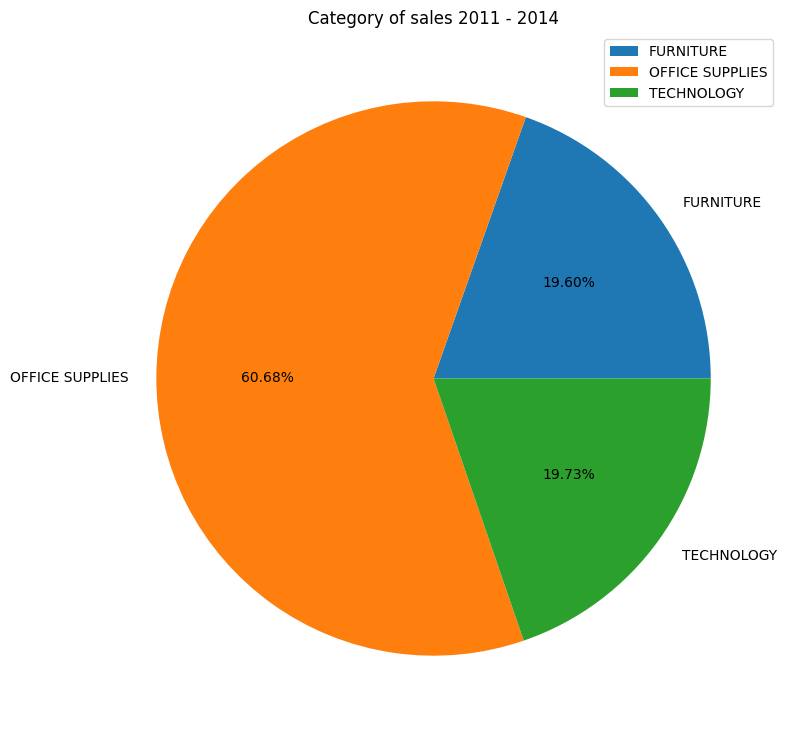

In [13]:
plt.figure(figsize=(16, 9))
plt.pie(categoryGroup['count'], labels=categoryGroup['category'], autopct='%1.2f%%')
plt.title('Category of sales 2011 - 2014')
plt. legend()
plt.show()

In [14]:
countryGroup=dfc.groupby(['country','category'])['quantity'].sum().reset_index(name='count')
# Group the data by country and category, and calculate the total sales count
countryCount = countryGroup.groupby(['country', 'category'])['count'].sum().reset_index()

#top 10 country on sales
topCountryList = countryCount.groupby('country')['count'].sum().nlargest(10).index.tolist()
topCountryDF=countryCount[countryCount['country'].isin(topCountryList)]
topCountryDF=topCountryDF.sort_values('count', ascending=False)
topCountryDF

,country,category,count
395,United States,OFFICE SUPPLIES,22917
394,United States,FURNITURE,8033
123,Franze,OFFICE SUPPLIES,7094
396,United States,TECHNOLOGY,6942
18,Australia,OFFICE SUPPLIES,6008
230,Mexico,OFFICE SUPPLIES,5676
132,Germany,OFFICE SUPPLIES,5065
392,United Kingdom,OFFICE SUPPLIES,4129
72,China,OFFICE SUPPLIES,4019
50,Brazil,OFFICE SUPPLIES,3402


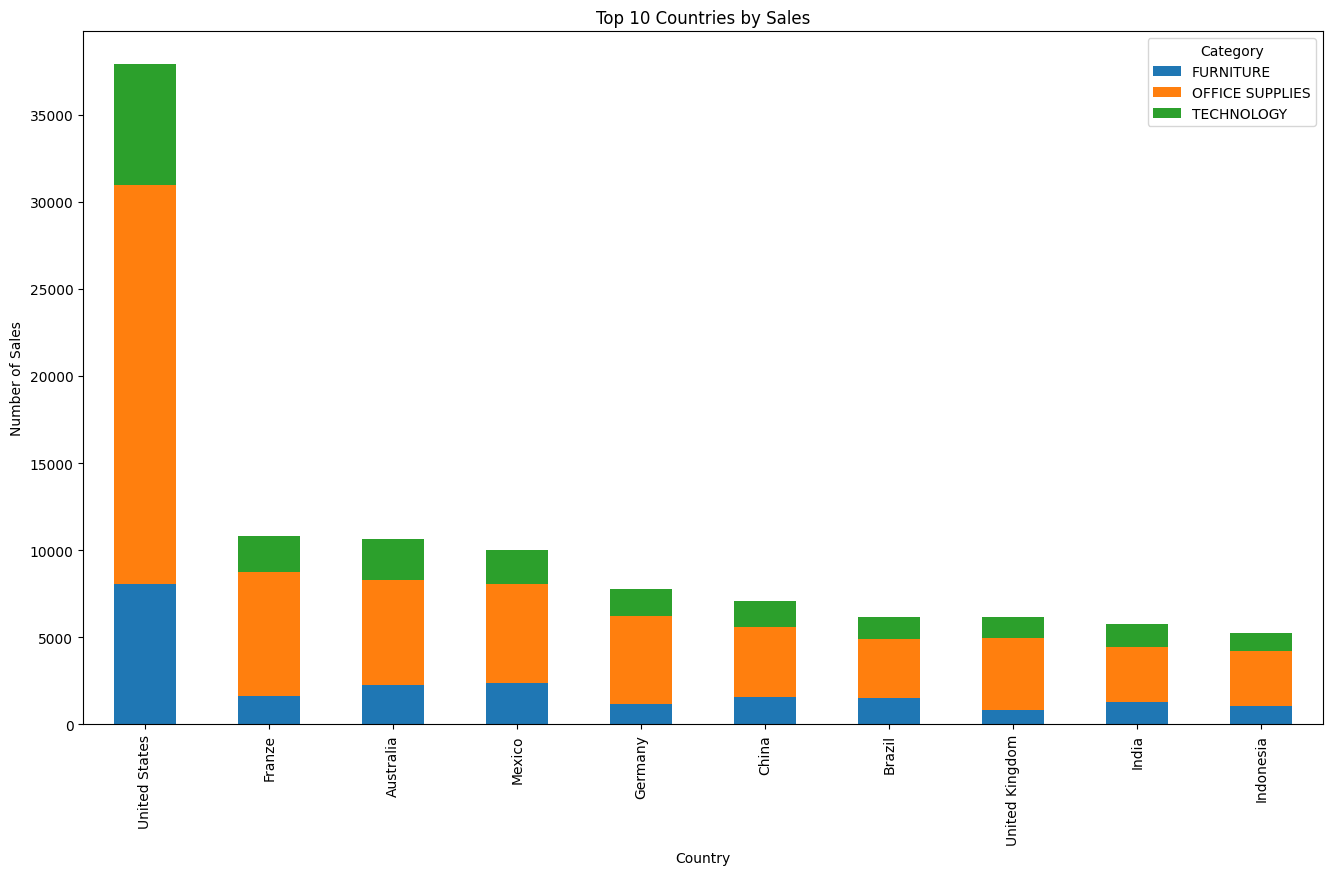

In [15]:
countryGrouped = topCountryDF.groupby(['country', 'category']).sum()
countryUnstacked = countryGrouped.unstack()
total_count = countryUnstacked.sum(axis=1)
sorted_index = total_count.sort_values(ascending=False).index
sorted_unstacked = countryUnstacked.loc[sorted_index]
ax = sorted_unstacked.plot(kind='bar', stacked=True, figsize=(16, 9))
ax.set_xlabel('Country')
ax.set_ylabel('Number of Sales')
ax.set_title('Top 10 Countries by Sales')
ax.legend(title='Category', labels=countryUnstacked.columns.get_level_values('category'))
plt.show()


* United States is most valuable country in Sale
* Comparatively the United States has most number of sales

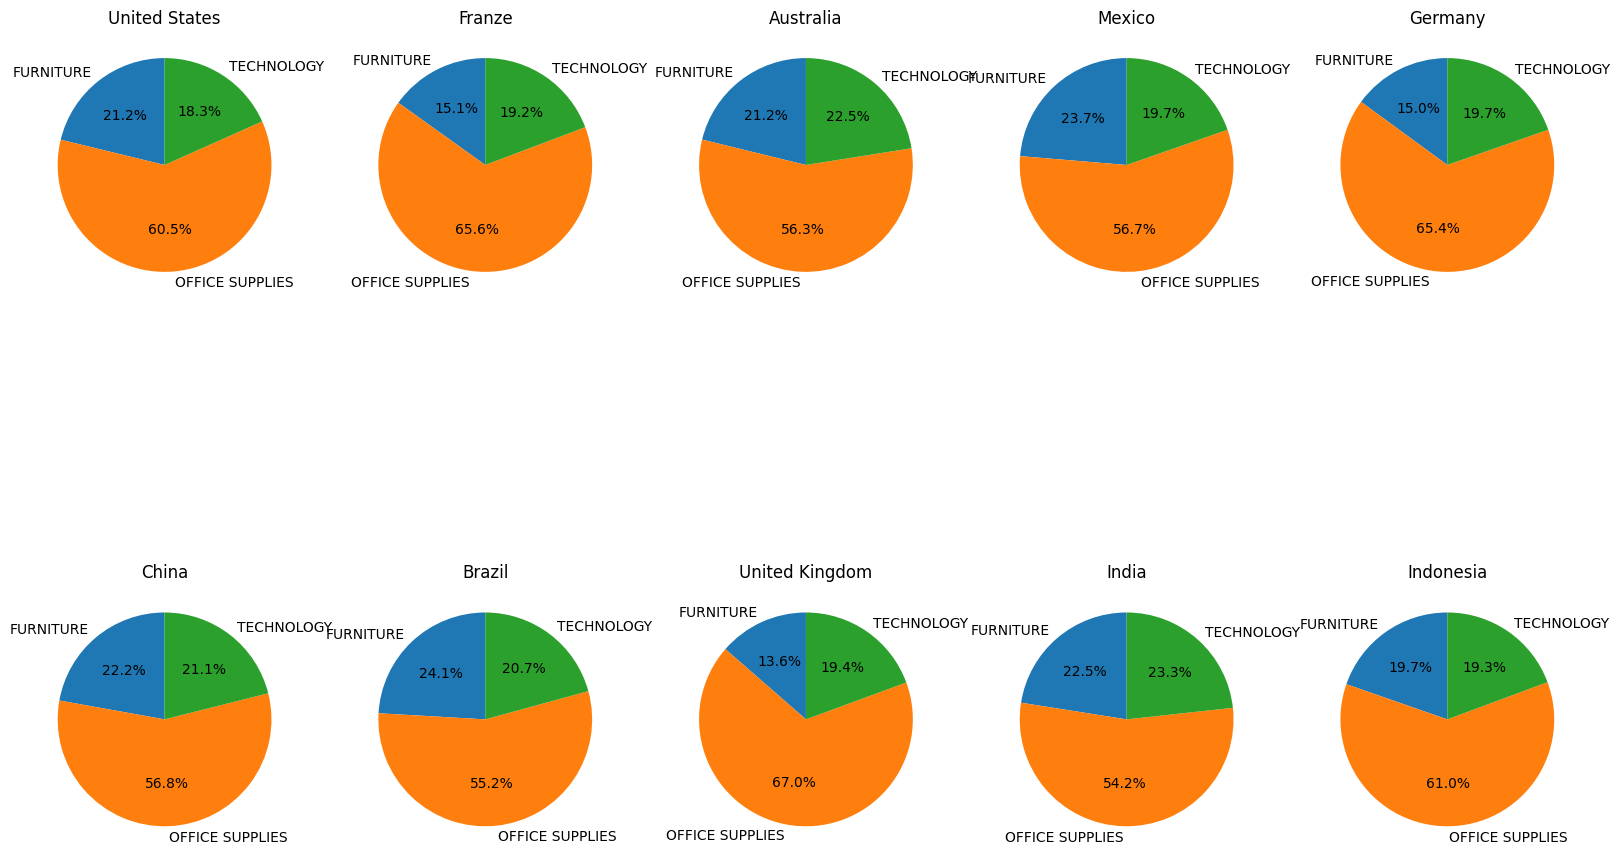

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))
plt.subplots_adjust(hspace=0.5)
for i, country in enumerate(topCountryList):
    # Get the sales data for the country
    country_data = countryGroup[countryGroup['country']==country]
    
    # Create the pie chart for the country
    ax = axs[i//5, i%5]
    ax.pie(country_data['count'], labels=country_data['category'], autopct='%1.1f%%', startangle=90)
    ax.set_title(country)

plt.show()


* For each top sale country the Office supplies had been sold out most

In [17]:
yearGroup=dfc.groupby(['year','category'])['quantity'].sum().reset_index(name='count')
# Group the data by country and category, and calculate the total sales count
yearCount = yearGroup.groupby(['year', 'category'])['count'].sum().reset_index()
yearCount

,year,category,count
0,2011,FURNITURE,6306
1,2011,OFFICE SUPPLIES,18995
2,2011,TECHNOLOGY,6164
3,2012,FURNITURE,7279
4,2012,OFFICE SUPPLIES,23135
5,2012,TECHNOLOGY,7697
6,2013,FURNITURE,9700
7,2013,OFFICE SUPPLIES,29147
8,2013,TECHNOLOGY,9289
9,2014,FURNITURE,11672


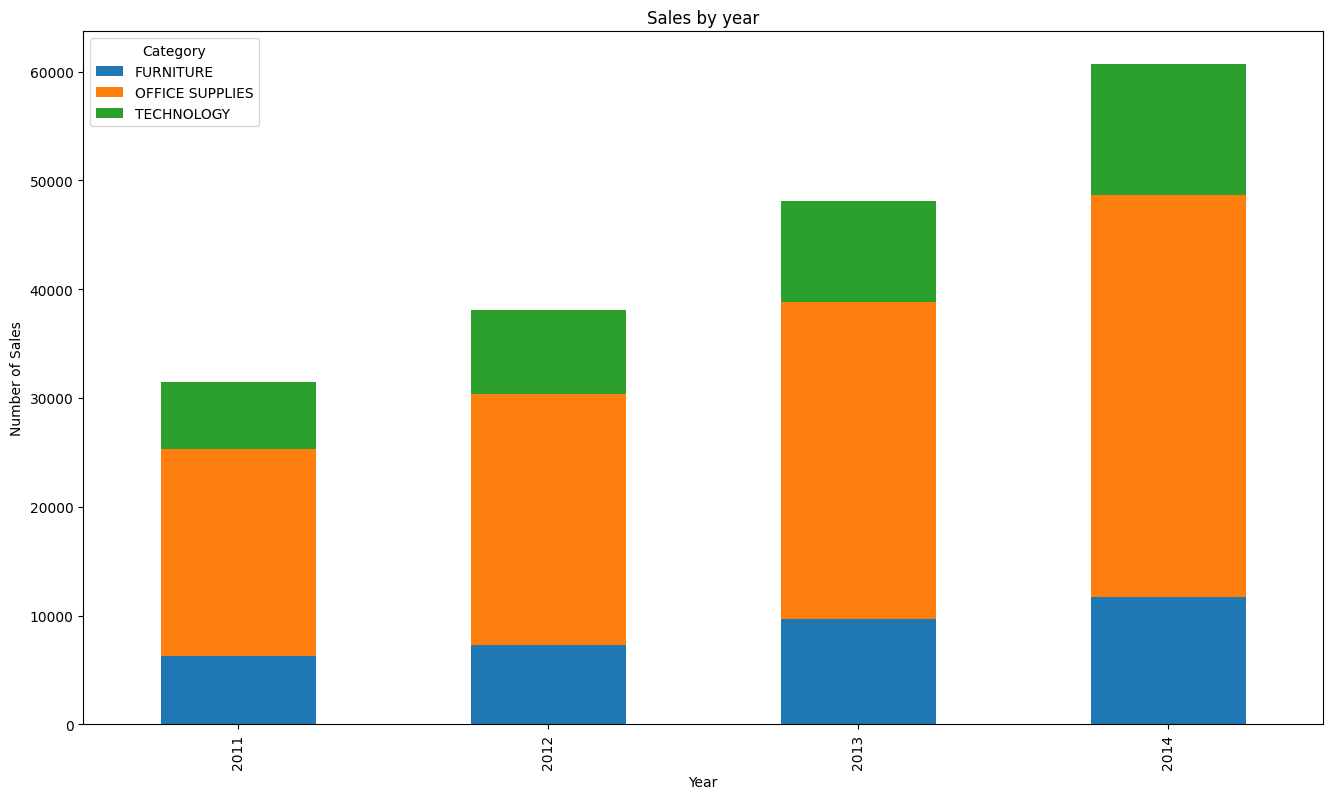

In [18]:
yearGrouped = yearCount.groupby(['year', 'category']).sum()
yearUnstacked = yearGrouped.unstack()
ax = yearUnstacked.plot(kind='bar', stacked=True, figsize=(16, 9))

ax.set_xlabel('Year')
ax.set_ylabel('Number of Sales')
ax.set_title('Sales by year')
ax.legend(title='Category', labels=yearUnstacked.columns.get_level_values('category'))
plt.show()


* Every Year Sales had been increased
* Every Year the Office Supply sales also increased

In [19]:
productGroup=dfc.groupby(['product_name'])['quantity'].sum().reset_index(name='count')
# Group the data by country and category, and calculate the total sales count
productCount = productGroup.groupby(['product_name'])['count'].sum().reset_index()

#top 15 country on sales
topProductList = productCount.groupby('product_name')['count'].sum().nlargest(20).index
topProductDF=productCount[productCount['product_name'].isin(topProductList)]
topProductDF=topProductDF.sort_values('count', ascending=False)
topProductDF

,product_name,count
1905,Staples,876
516,Cardinal Index Tab,618
54,Acco Binder Covers,612
1932,Stockwell Thumb Tacks,596
1857,Smead Lockers,573
506,Cardinal 3-Hole Punch,572
267,Avery Binding Machine,571
1131,Ibico Binding Machine,568
1926,Stockwell Clamps,567
1792,Sanford Pencil Sharpener,565


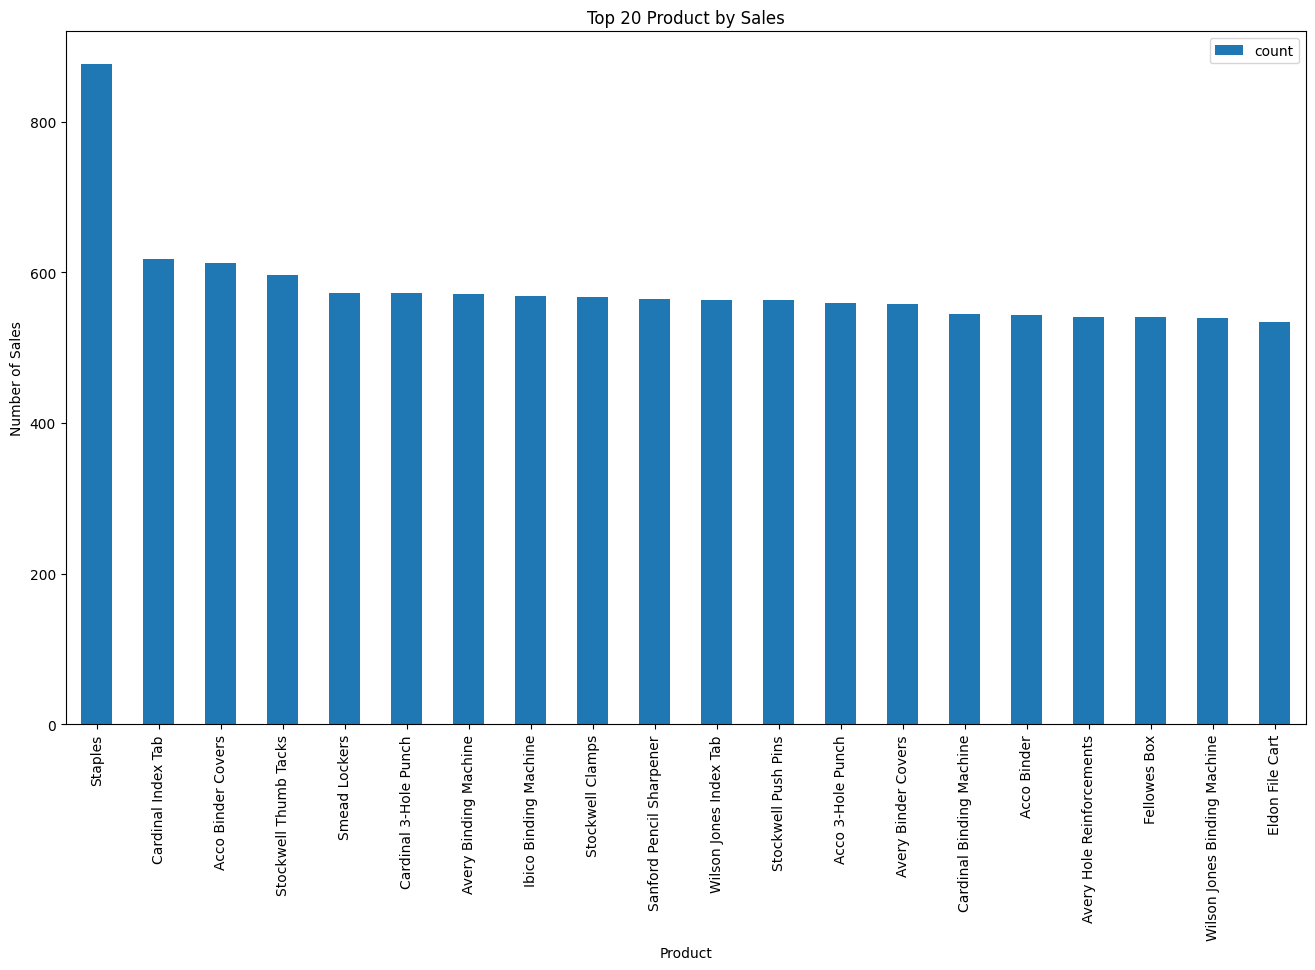

In [20]:
ax = topProductDF.plot(kind='bar',x='product_name', stacked=True, figsize=(16, 9))
ax.set_xlabel('Product')
ax.set_ylabel('Number of Sales')
ax.set_title('Top 20 Product by Sales')
plt.show()

##### Profit               

In [21]:
dfc['profit']=dfc['revenue']-dfc['expenses']
dfc.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,Unit Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year,profit
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011,59.4698
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011,46.5426
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,128,4,0.0,8.17,High,512,452.5479,520.17,2011,67.6221
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,177,3,0.5,4.82,High,531,235.1784,270.32,2011,35.1416
5,IN-2011-79397,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,299,2,0.1,1.80,Medium,598,469.8000,540.00,2011,70.2000


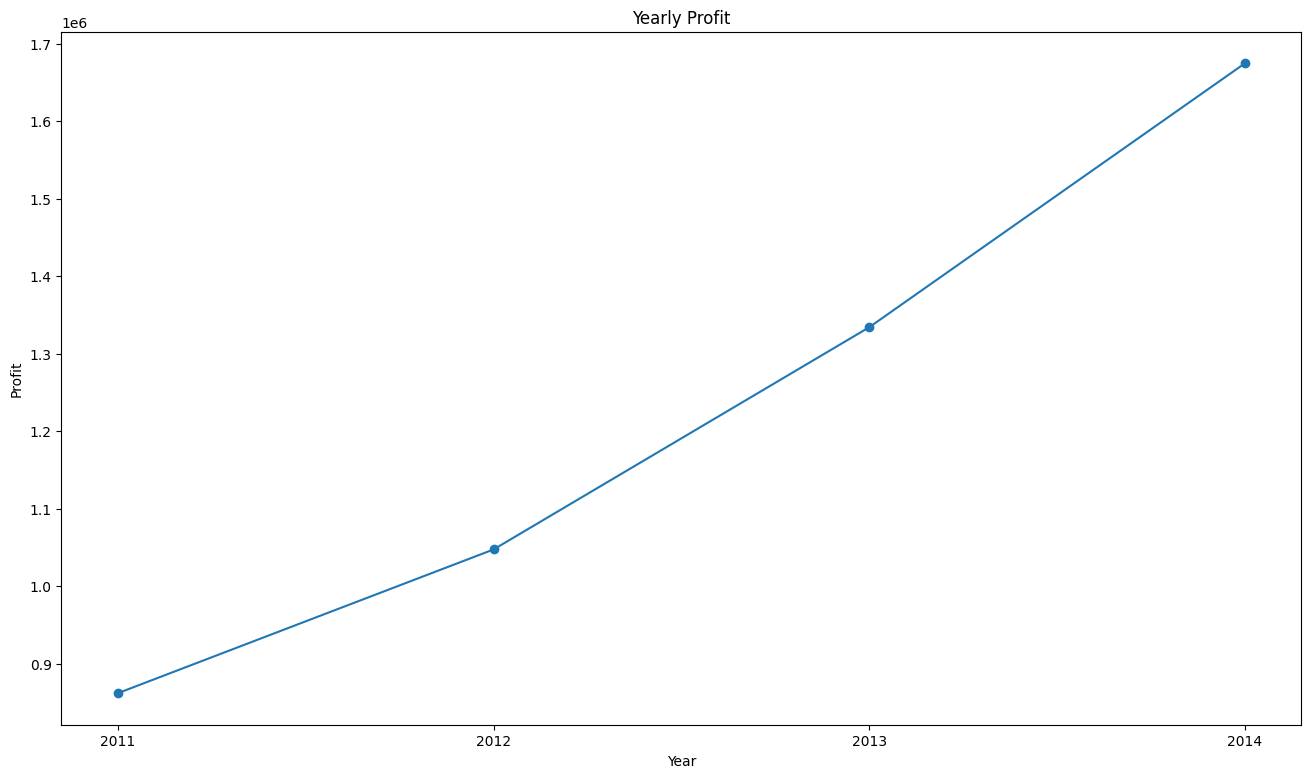

In [22]:
yearly_profit = dfc.groupby('year')['profit'].sum().reset_index(name='profit')
plt.figure(figsize=(16, 9))
plt.plot(yearly_profit['year'],yearly_profit['profit'])
plt.scatter(yearly_profit['year'],yearly_profit['profit'])
plt.xticks(range(2011,2015,1))
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Yearly Profit')
plt.show()

* There was an increment in profit in every year

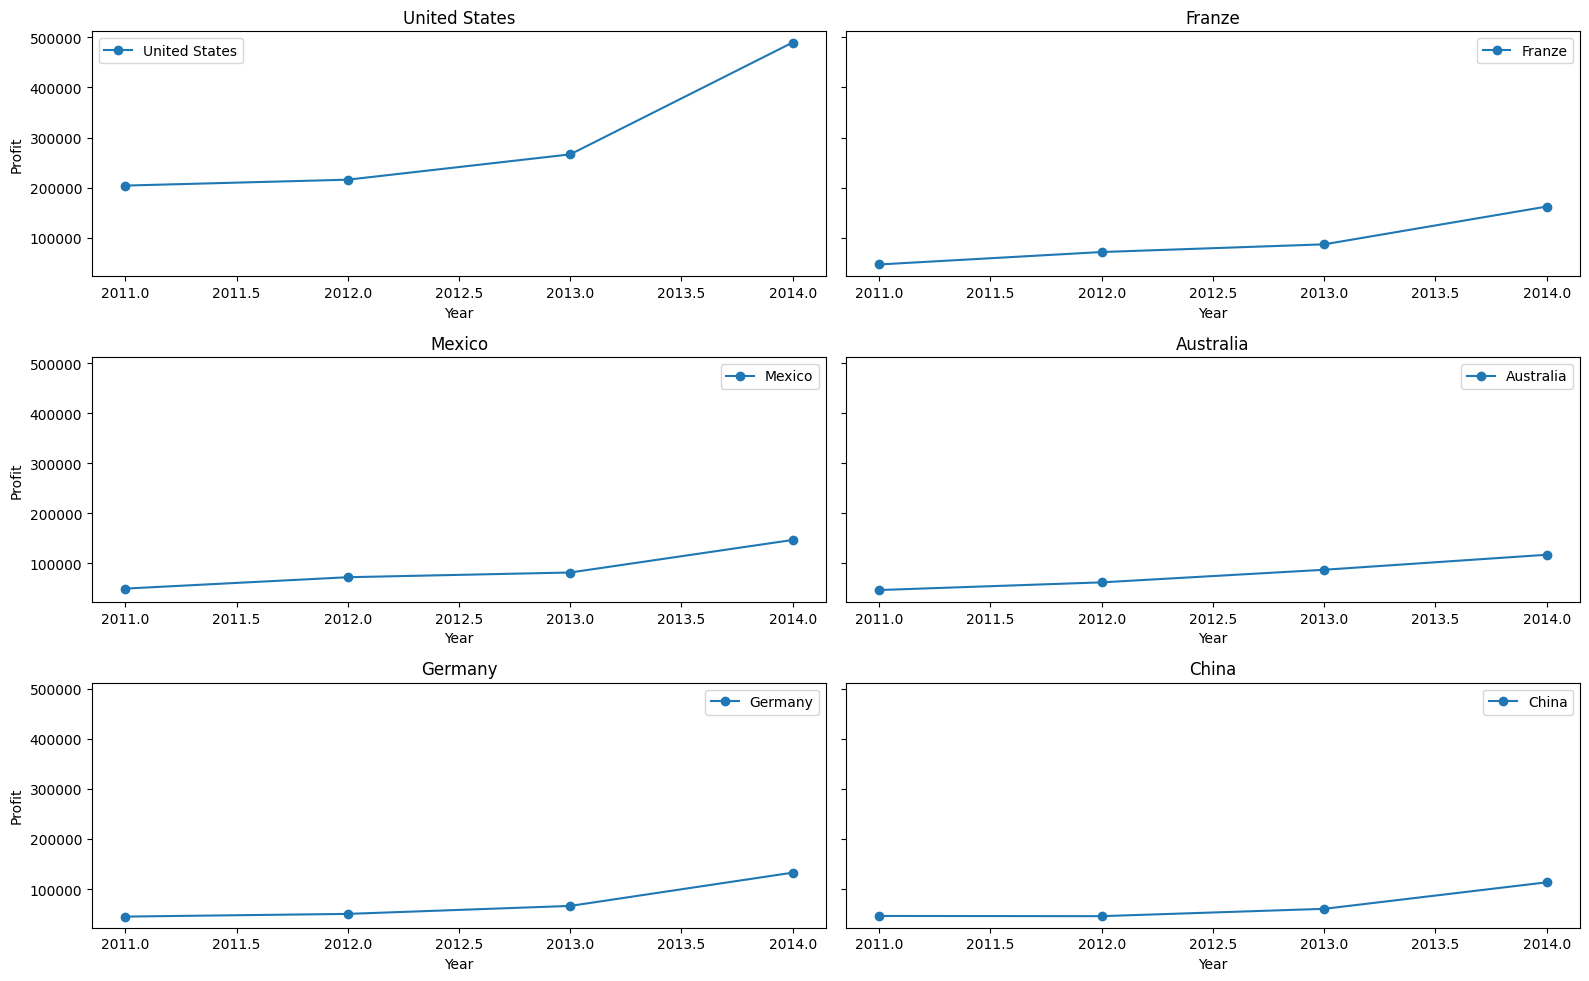

In [23]:
countryProfitYear= dfc.groupby(['country', 'year'])['profit'].sum()

sorted_countries = countryProfitYear.groupby('country').sum().sort_values(ascending=False)
top_countries = sorted_countries.index[:6]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,16), sharey=True)

for i, country in enumerate(top_countries):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    

    countryProfitYear.loc[country].plot(ax=ax, label=country, marker='o')
    
    ax.set_title(country)
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Profit')
    

if len(top_countries) < 10:
    for i in range(len(top_countries), 10):
        row = i // 2
        col = i % 2
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


* In top selling contries individual profit of each country also has increment in years 

In [24]:
countryProfitYear

country      year
Afghanistan  2011     1532.3386
             2012     2019.0326
             2013     1318.1818
             2014     6279.9969
Albania      2011      471.7934
                        ...    
Zambia       2014     -361.4251
Zimbabwe     2011      322.3493
             2012      498.0768
             2013      376.3292
             2014   -14556.2512
Name: profit, Length: 537, dtype: float64

In [25]:
yearly_profit

,year,profit
0,2011,8.621172e+05
1,2012,1.047604e+06
2,2013,1.334380e+06
3,2014,1.675006e+06


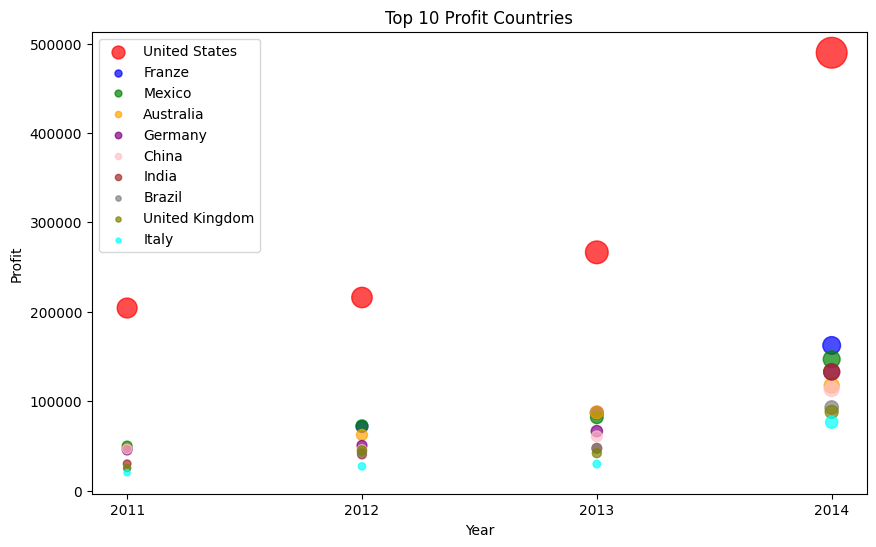

In [26]:
top_countries = countryProfitYear.groupby('country').sum().nlargest(10).index.tolist()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan']

# Plot the bubble chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, country in enumerate(top_countries):
    data = countryProfitYear.loc[country]
    x = data.index
    y = data.values
    size = y/1000  # Set the size of the bubble based on the profit
    ax.scatter(x, y, s=size, c=colors[i], alpha=0.7, label=country)

# Add axis labels and title
plt.xticks(range(2011,2015, 1))
ax.set_xlabel('Year')
ax.set_ylabel('Profit')
ax.set_title('Top 10 Profit Countries')

# Add a legend
ax.legend(loc='best', markerscale=0.5, scatterpoints=1, fontsize=10)

plt.show()


* Comparatively from the United States the porfit has more increment in years

##### Least sale Analysis

In [27]:
leastCountryList = countryCount.groupby('country')['count'].sum().nsmallest(10).index.tolist()
leastCountryDF=countryCount[countryCount['country'].isin(leastCountryList)]
leastCountryDF=leastCountryDF.sort_values('count', ascending=True)
leastCountryDF

,country,category,count
346,Swaziland,TECHNOLOGY,1
16,Armenia,OFFICE SUPPLIES,1
111,Equatorial Guinea,TECHNOLOGY,1
212,Macedonia,FURNITURE,2
113,Eritrea,TECHNOLOGY,2
110,Equatorial Guinea,OFFICE SUPPLIES,2
15,Armenia,FURNITURE,2
27,Bahrain,TECHNOLOGY,2
112,Eritrea,OFFICE SUPPLIES,2
55,Burundi,FURNITURE,4


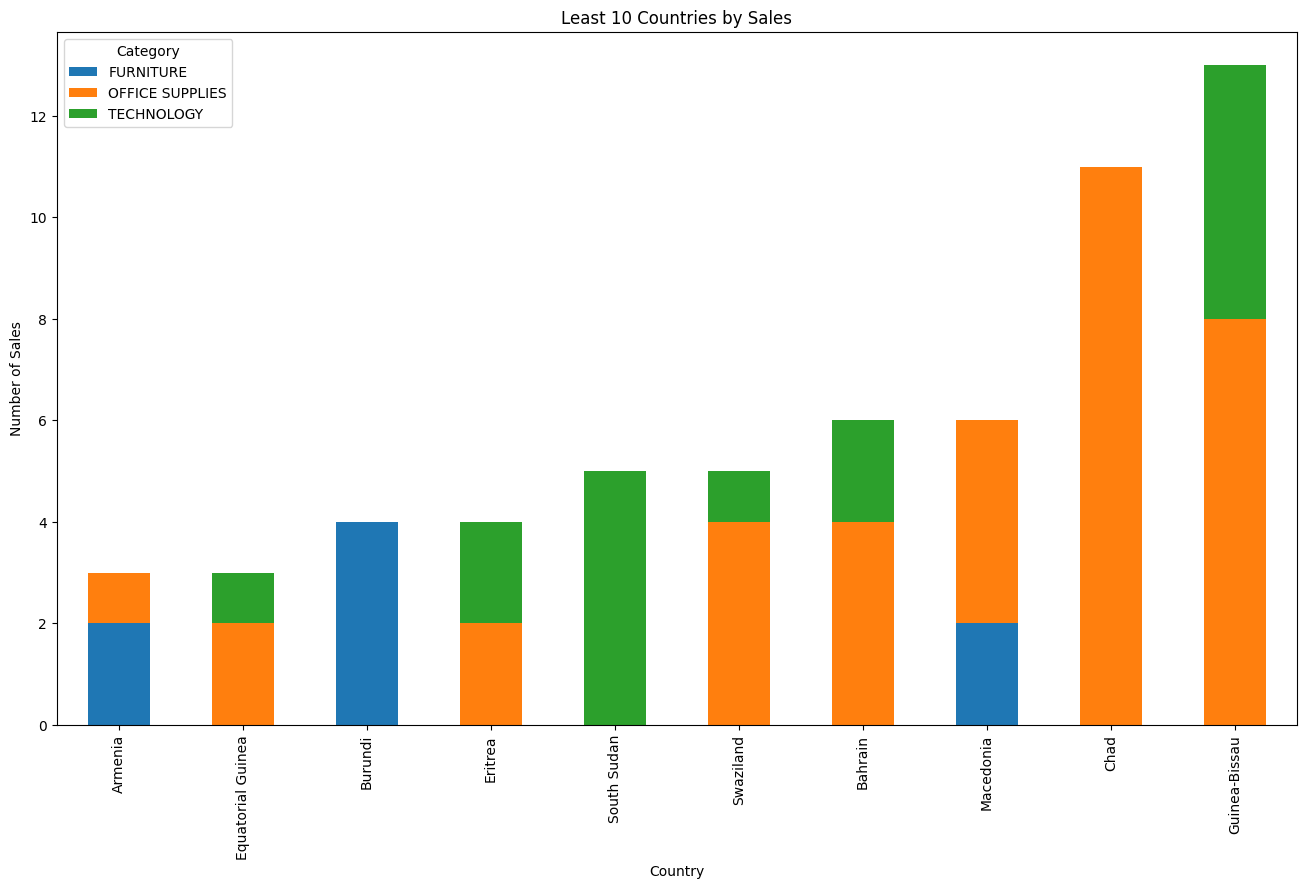

In [28]:
leastCountryGrouped = leastCountryDF.groupby(['country', 'category']).sum()
leastCountryUnstacked = leastCountryGrouped.unstack()
least_total_count = leastCountryUnstacked.sum(axis=1)
least_sorted_index = least_total_count.sort_values(ascending=True).index
least_sorted_unstacked = leastCountryUnstacked.loc[least_sorted_index]
ax = least_sorted_unstacked.plot(kind='bar', stacked=True, figsize=(16, 9))
ax.set_xlabel('Country')
ax.set_ylabel('Number of Sales')
ax.set_title('Least 10 Countries by Sales')
ax.legend(title='Category', labels=countryUnstacked.columns.get_level_values('category'))
plt.show()

In [29]:
leastCountryList = countryCount.groupby('country')['count'].sum().nsmallest(10).index.tolist()
leastCountryList

['Armenia',
 'Equatorial Guinea',
 'Burundi',
 'Eritrea',
 'South Sudan',
 'Swaziland',
 'Bahrain',
 'Macedonia',
 'Chad',
 'Guinea-Bissau']

##### Shipping Cost

In [30]:
shipingCountry=dfc.groupby(['country','category'])['shipping_cost'].mean().reset_index(name='Avg Shipping')
shipingCountry

,country,category,Avg Shipping
0,Afghanistan,FURNITURE,109.196923
1,Afghanistan,OFFICE SUPPLIES,12.896667
2,Afghanistan,TECHNOLOGY,41.147500
3,Albania,FURNITURE,21.736667
4,Albania,OFFICE SUPPLIES,6.863333
...,...,...,...
413,Zambia,OFFICE SUPPLIES,17.414355
414,Zambia,TECHNOLOGY,51.954211
415,Zimbabwe,FURNITURE,19.432857
416,Zimbabwe,OFFICE SUPPLIES,3.723281


In [31]:
shipingCountryYear=dfc.groupby(['country','year'])['shipping_cost'].mean()
shipingCountryYear

country      year
Afghanistan  2011    18.357778
             2012    75.201333
             2013    30.488333
             2014    33.743684
Albania      2011    61.636000
                       ...    
Zambia       2014    15.504545
Zimbabwe     2011     4.485385
             2012     7.740000
             2013     4.224444
             2014     6.493667
Name: shipping_cost, Length: 537, dtype: float64

##### Shipping Cost comparision

###### Top Ten High Profit countries

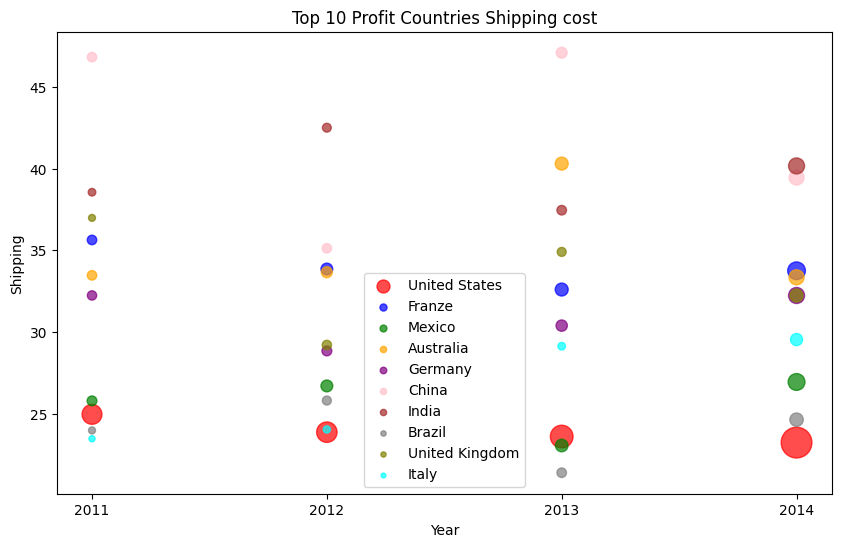

In [37]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan']

# Plot the bubble chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, country in enumerate(top_countries):
    data = shipingCountryYear.loc[country]
    x = data.index
    y = data.values
    size = np.abs(countryProfitYear.loc[country].values)/1000  # Set the size of the bubble based on the profit
    ax.scatter(x, y, s=size, c=colors[i], alpha=0.7, label=country)

# Add axis labels and title
plt.xticks(range(2011,2015, 1))
ax.set_xlabel('Year')
ax.set_ylabel('Shipping')
ax.set_title('Top 10 Profit Countries Shipping cost')

# Add a legend
ax.legend(loc='best', markerscale=0.5, scatterpoints=1, fontsize=10)

plt.show()

* From above plot the size of points indicate the profit
* In high sales and high profit countries the shipping cost is low


###### Loss Countries

In [33]:
lossCountries = dfc[(dfc['profit'] <0)].groupby(['country', 'year'])['profit'].sum()
lossCountries

country      year
Afghanistan  2014     -1124.82800
Algeria      2014    -14165.08840
Angola       2014     -7748.27430
Argentina    2014    -36528.65604
Australia    2014   -137770.98698
                         ...     
Venezuela    2014    -19447.89290
Vietnam      2014     -8957.13000
Yemen        2014     -5102.01760
Zambia       2014     -4159.49000
Zimbabwe     2014    -15413.21840
Name: profit, Length: 124, dtype: float64

In [34]:
lossGroup=dfc[(dfc['profit'] <0)].groupby(['country'])['profit'].mean().reset_index(name='loss')
losstCount = lossGroup.groupby(['country'])['loss'].mean().reset_index()

#top 15 country on sales
lostCountryList = losstCount.groupby('country')['loss'].sum().nlargest(10).index
lostCountryList

Index(['Nepal', 'Guinea-Bissau', 'Libya', 'Georgia', 'Macedonia', 'Paraguay',
       'Singapore', 'Niger', 'Somalia', 'Trinidad and Tobago'],
      dtype='object', name='country')

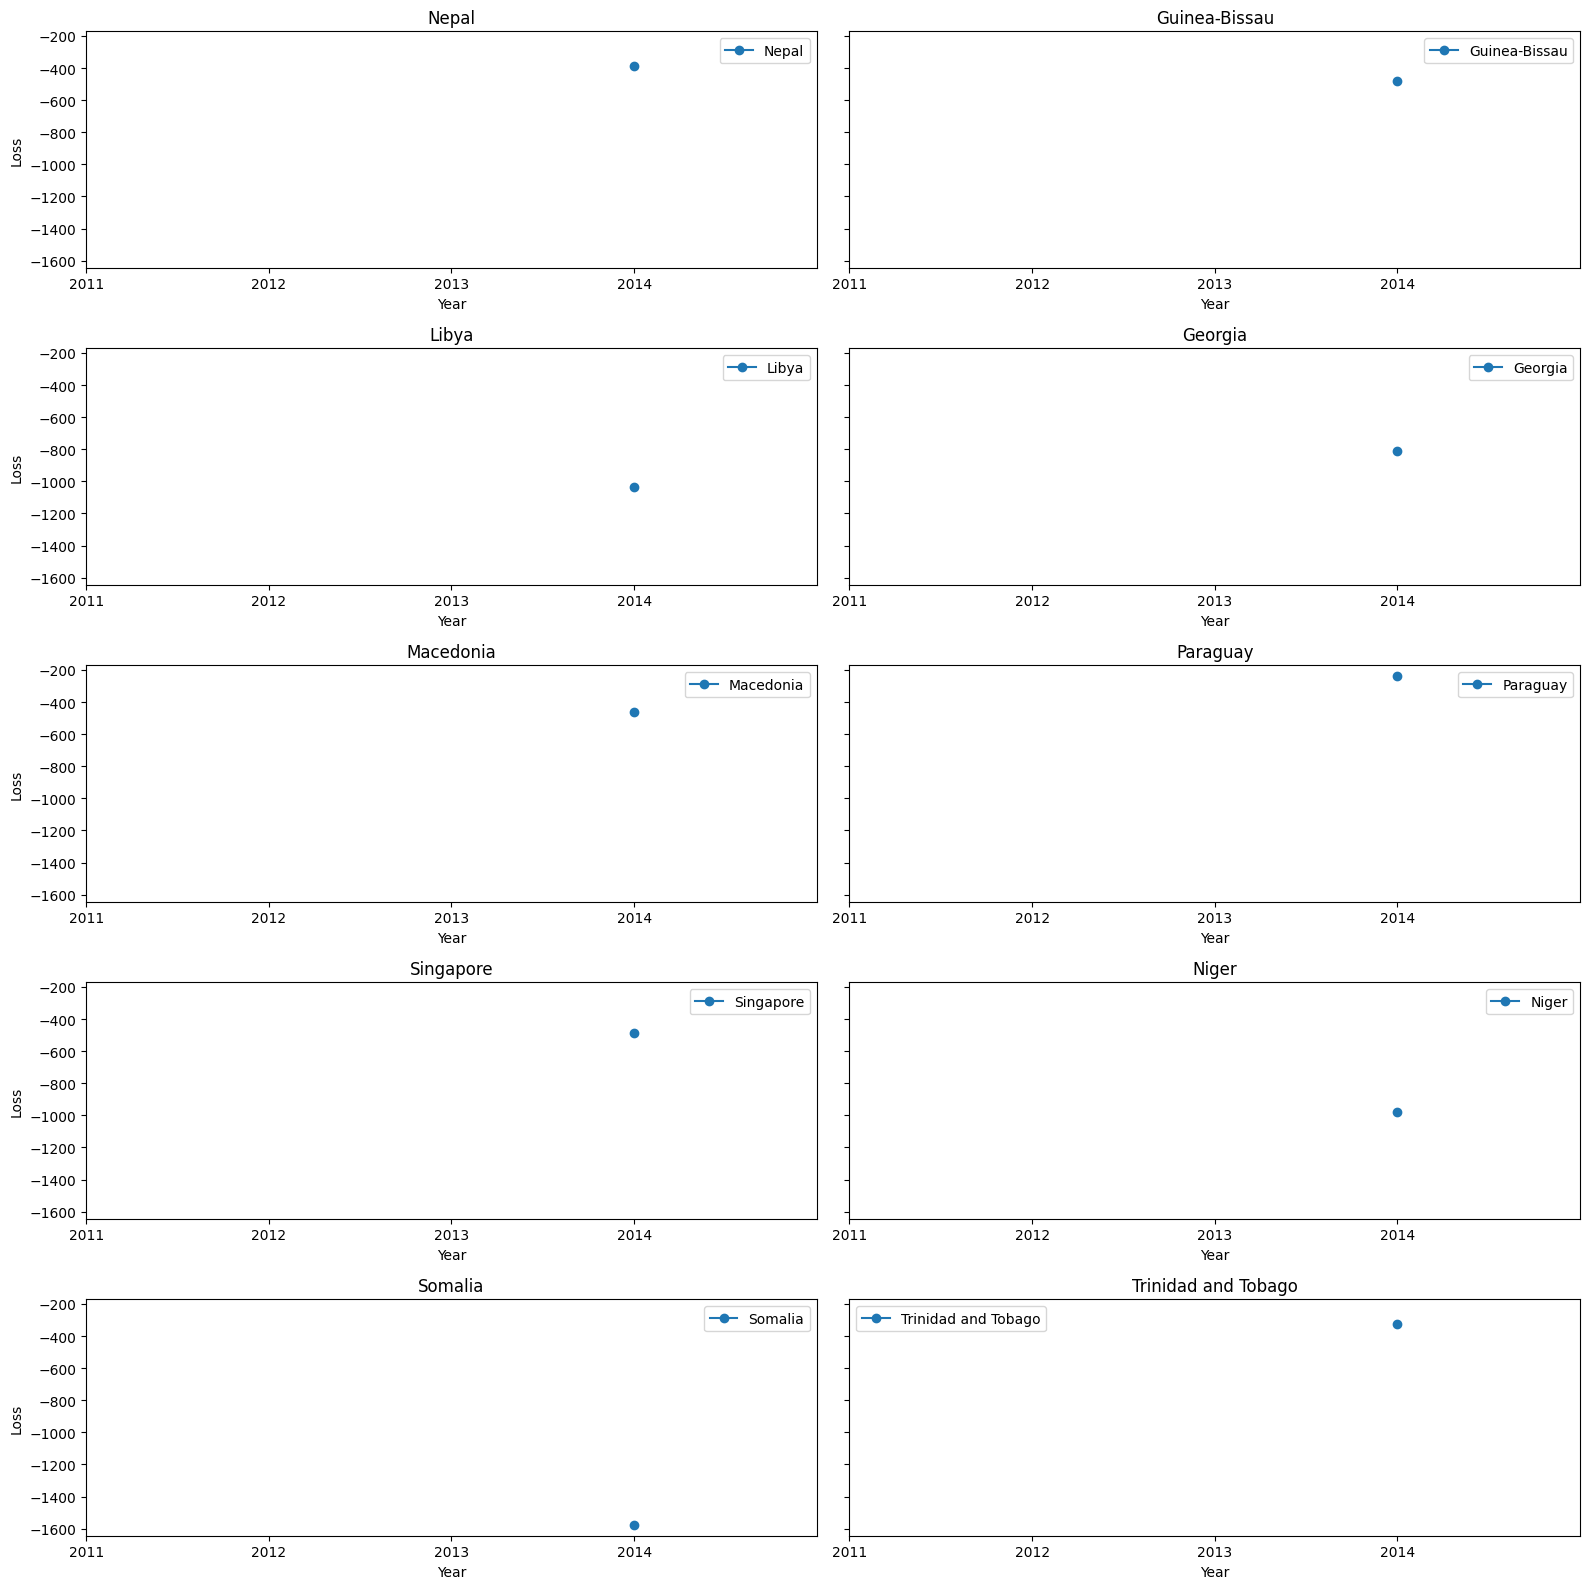

In [35]:
loss_sorted_countries = lossCountries.groupby('country').sum().sort_values(ascending=False)
loss_countries = loss_sorted_countries.index[:10]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,16), sharey=True)

for i, country in enumerate(lostCountryList):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    

    lossCountries.loc[country].plot(ax=ax, label=country, marker='o')
    
    ax.set_title(country)
    ax.set_xticks(range(2011, 2015, 1))
    ax.set_xticklabels(range(2011, 2015, 1))
    ax.set_xlim(2011,2015)
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Loss')
    

if len(top_countries) < 10:
    for i in range(len(loss_countries), 10):
        row = i // 2
        col = i % 2
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


* In 2014 the store has to face loss in low demand countries

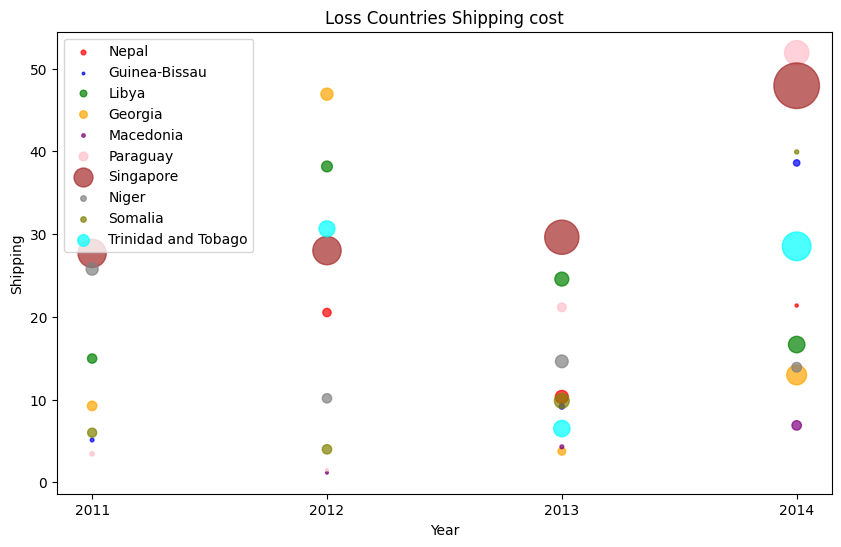

In [36]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan']
fig, ax = plt.subplots(figsize=(10, 6))

for i, country in enumerate(lostCountryList):
    data = shipingCountryYear.loc[country]
    x = data.index
    y = data.values
    size = np.abs(countryProfitYear.loc[country].values)/10  # Set the size of the bubble based on the profit
    ax.scatter(x, y, s=size, c=colors[i], alpha=0.7, label=country)

# Add axis labels and title
plt.xticks(range(2011,2015, 1))
ax.set_xlabel('Year')
ax.set_ylabel('Shipping')
ax.set_title('Loss Countries Shipping cost')

# Add a legend
ax.legend(loc='best', markerscale=0.5, scatterpoints=1, fontsize=10)

plt.show()

* In above plot the size of points indicate the loss
* From above the higher shipping countries had a higher amount of loss

#####  Conclusion

* To avoid loss the store need to find a altinative or cheaper way in shipping for low demand countries
* Mean while the United States is thier most valuable country for the sale, therefore they need to provide higher service in orider to keep their higer profit margin